**BASIC**

In [ ]:
#Basic
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import os

#Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree

#Model Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

import eli5 #for attribute importance
from eli5.sklearn import PermutationImportance

In [ ]:
from google.colab import files
files.upload()

In [ ]:
#Read Data
data = pd.read_csv("./data.csv")
data.head()

In [ ]:
data.describe()

In [22]:
data.shape

(303, 14)

In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(data)
profile

In [ ]:
labels.shape

In [ ]:
#Split Data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 56)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

In [ ]:
#Run Model
model = RandomForestClassifier(max_depth = 5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1] #store predicted probabilites
y_pred = model.predict(x_test)


In [48]:
#Accuracy
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9338842975206612
Testing Accuracy : 0.8360655737704918


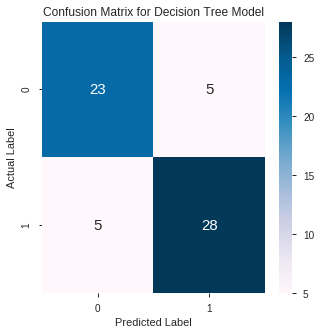

In [74]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')
plt.title('Confusion Matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [61]:
#Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
estimator = model.estimators_[1]

estimator = model.estimators_[1]
feature_names = [i for i in x_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call

from IPython.display import Image


In [69]:
#Sensitivity and Specificity
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8214285714285714
Specificity :  0.8484848484848485


In [ ]:
falsepr, truepr, thresholds = roc_curve(y_test, y_pred_quant) #Create true and false positive rates

fig, ax = plt.subplots()
ax.plot(falsepr, truepr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [71]:
#Area Under Curve
auc = auc(falsepr, truepr)
print("AUC Score :", auc)

AUC Score : 0.9383116883116883


**ANALYSIS**

In [ ]:
#Weights/Importance of each feature
perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())